In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as st

In [27]:
steve = pd.read_csv('commodity_trade_statistics_data.csv',low_memory=False)
world_emissions = pd.read_csv('co2_emission.csv')

In [28]:
bob = pd.read_csv('GDP-countries-1990-2018.csv')
saul = pd.read_csv('2018-2010_export.csv')

In [29]:
trade_df = pd.DataFrame(steve)
world_em_df = pd.DataFrame(world_emissions)
gdp_df = pd.DataFrame(bob)
india_export_df = pd.DataFrame(saul)

In [30]:
trade_df['Entity'] = trade_df['country_or_area']
trade_df.drop(columns = ['country_or_area'], inplace = True)
trade_df

,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Entity
0,2016,010410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals,Afghanistan
1,2016,010420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals,Afghanistan
2,2008,010210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals,Afghanistan
3,2016,010290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals,Albania
4,2016,010392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals,Albania
...,...,...,...,...,...,...,...,...,...,...
8225866,2001,TOTAL,ALL COMMODITIES,Export,1206807424,NaN,No Quantity,NaN,all_commodities,Zimbabwe
8225867,2001,TOTAL,ALL COMMODITIES,Re-Export,15943977,NaN,No Quantity,NaN,all_commodities,Zimbabwe
8225868,2000,TOTAL,ALL COMMODITIES,Export,1924962432,NaN,No Quantity,NaN,all_commodities,Zimbabwe
8225869,1995,TOTAL,ALL COMMODITIES,Import,2658853376,NaN,No Quantity,NaN,all_commodities,Zimbabwe


In [31]:
india_gdp_df = gdp_df.loc[gdp_df['Country '] == 'India']
india_gdp_df.drop(columns = ['Country Code'], inplace = True)
india_gdp_df

C:\Users\popes\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
103,India,1236.671208,1265.917481,1338.664595,1407.473802,1503.745417,1620.175387,1741.084404,1808.708364,1906.7799,...,4360.15405,4624.561404,4909.584076,5252.272397,5682.731285,6133.887015,6634.844574,7168.992484,7762.88177,NaN


In [32]:
fixed_india_gdp_df = pd.melt(india_gdp_df, id_vars=['Country '], value_vars=['1990','1991','1992','1993','1994',
                                                                             '1995','1996','1997','1998','1999','2000',
                                                                            '2001','2002','2003','2004','2005','2006',
                                                                            '2007','2008','2009','2010','2011','2012',
                                                                            '2013','2014','2015','2016','2017','2018',])
fixed_india_gdp_df.columns = ['Country','Year','GDP']
fixed_india_gdp_df['Year'] = pd.to_numeric(fixed_india_gdp_df['Year'])
final_india_gdp = pd.DataFrame(fixed_india_gdp_df.loc[(fixed_india_gdp_df['Year'] >= 2010) & (fixed_india_gdp_df['Year'] < 2018)])
final_india_gdp

,Country,Year,GDP
20,India,2010,4360.154050
21,India,2011,4624.561404
22,India,2012,4909.584076
23,India,2013,5252.272397
24,India,2014,5682.731285
25,India,2015,6133.887015
26,India,2016,6634.844574
27,India,2017,7168.992484


In [8]:
india_export_df_us = india_export_df.loc[(india_export_df['country'] == 'U S A') & (india_export_df['year'] < 2018)]
india_export_df_us['value'] = india_export_df_us['value'].fillna(0)
india_export_df_us

<ipython-input-8-12bda84e207d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_export_df_us['value'] = india_export_df_us['value'].fillna(0)


,HSCode,Commodity,value,country,year
30406,1,LIVE ANIMALS.,0.00,U S A,2017
30407,2,MEAT AND EDIBLE MEAT OFFAL.,4.98,U S A,2017
30408,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",2105.93,U S A,2017
30409,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,86.65,U S A,2017
30410,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",1.44,U S A,2017
...,...,...,...,...,...
136073,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",24.37,U S A,2010
136074,96,MISCELLANEOUS MANUFACTURED ARTICLES.,60.76,U S A,2010
136075,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,73.07,U S A,2010
136076,98,PROJECT GOODS; SOME SPECIAL USES.,5.27,U S A,2010


In [9]:
year_group = india_export_df_us.groupby(['year'])
country = []
year = []
counter = 0
value_avg = pd.DataFrame()


value_avg['average_value'] = year_group['value'].mean()
for x in value_avg['average_value']:
    country.append("U S A")
    year.append(2010 + counter)
    counter = counter + 1
value_avg['country'] = country
value_avg['Total_Value'] = year_group['value'].sum()
value_avg['year'] = year
value_avg

,average_value,country,Total_Value,year
year,,,,
2010,258.077143,U S A,25291.56,2010
2011,354.503367,U S A,34741.33,2011
2012,368.927347,U S A,36154.88,2012
2013,399.406224,U S A,39141.81,2013
2014,433.145918,U S A,42448.30,2014
2015,411.588571,U S A,40335.68,2015
2016,435.174845,U S A,42211.96,2016
2017,488.552755,U S A,47878.17,2017


In [10]:
india_em_df = world_em_df.loc[(world_em_df['Entity'] == 'India') & (world_em_df['Year'] >= 2010)]
us_em_df = world_em_df.loc[(world_em_df['Entity'] == 'United States') & (world_em_df['Year'] >= 2010)]

In [11]:
india_em_df

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
9452,India,IND,2010,1.700027e+09
9453,India,IND,2011,1.817172e+09
9454,India,IND,2012,1.983759e+09
9455,India,IND,2013,1.997879e+09
9456,India,IND,2014,2.207534e+09
9457,India,IND,2015,2.276407e+09
9458,India,IND,2016,2.377448e+09
9459,India,IND,2017,2.466765e+09


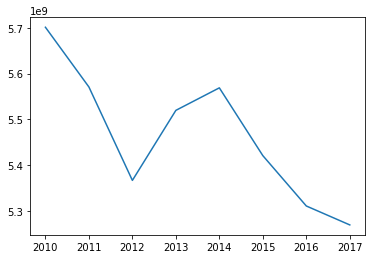

In [12]:
plt.plot(us_em_df['Year'],us_em_df['Annual CO₂ emissions (tonnes )'], label = 'US Emissions')


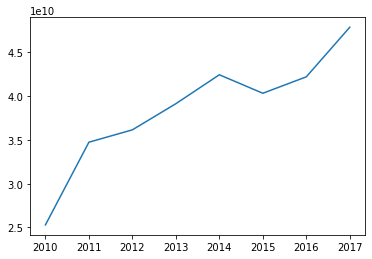

In [13]:
plt.plot(value_avg['year'],(value_avg['Total_Value']*1000000), label = 'total Trade Value')

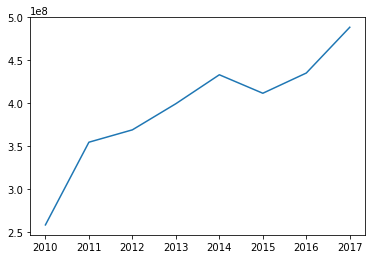

In [14]:
plt.plot(value_avg['year'],(value_avg['average_value']*1000000), label = 'Average Trade Value')

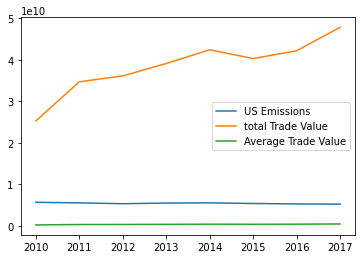

In [15]:
plt.plot(us_em_df['Year'],us_em_df['Annual CO₂ emissions (tonnes )'], label = 'US Emissions')
plt.plot(value_avg['year'],(value_avg['Total_Value']*1000000), label = 'total Trade Value')
plt.plot(value_avg['year'],(value_avg['average_value']*1000000), label = 'Average Trade Value')
plt.legend()
plt.show()

The correlation between both factors is -0.77
The linear regression equation is y = -3.6e-07x + 2344.61


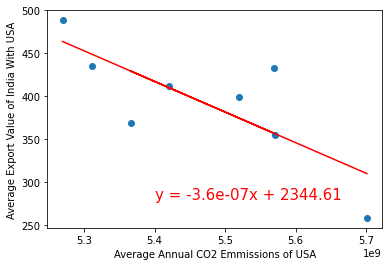

In [16]:
x_axis2 = us_em_df['Annual CO₂ emissions (tonnes )']
y_axis2 = value_avg['average_value']
correlation = st.pearsonr(x_axis2,y_axis2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,8)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis2,y_axis2)
plt.plot(x_axis2,regress_values,"r-")
plt.annotate(line_eq,(5400000000,280),fontsize=15,color="red")
plt.xlabel('Average Annual CO2 Emmissions of USA')
plt.ylabel('Average Export Value of India With USA')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression equation is {line_eq}')
plt.show()

In [17]:
india_em_df['Annual CO₂ emissions (tonnes )'].count()

8

The correlation between both factors is 0.93
The linear regression equation is y = 2.3e-07x + -98.97


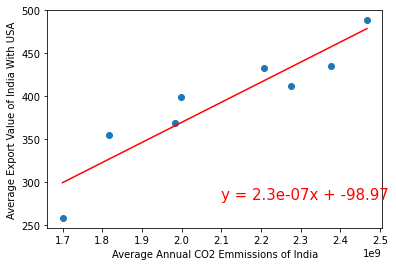

In [18]:
x_axis3 = india_em_df['Annual CO₂ emissions (tonnes )']
y_axis3 = value_avg['average_value']
correlation = st.pearsonr(x_axis3,y_axis3)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis3, y_axis3)
regress_values = x_axis3 * slope + intercept
line_eq = "y = " + str(round(slope,8)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis3,y_axis3)
plt.plot(x_axis3,regress_values,"r-")
plt.annotate(line_eq,(2100000000,280),fontsize=15,color="red")
plt.xlabel('Average Annual CO2 Emmissions of India')
plt.ylabel('Average Export Value of India With USA')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression equation is {line_eq}')
plt.show()

The correlation between both factors is -0.76
The linear regression equation is y = -3.5e-05x + 227324.76


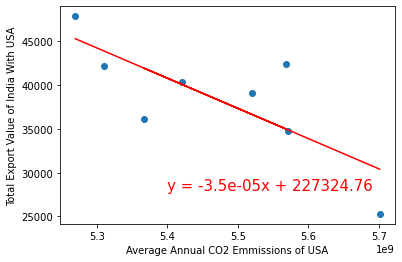

In [19]:

x_axis4 = us_em_df['Annual CO₂ emissions (tonnes )']
y_axis4 = value_avg['Total_Value']
correlation = st.pearsonr(x_axis4,y_axis4)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis4, y_axis4)
regress_values = x_axis4 * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis4,y_axis4)
plt.plot(x_axis4,regress_values,"r-")
plt.annotate(line_eq,(5400000000,28000),fontsize=15,color="red")
plt.xlabel('Average Annual CO2 Emmissions of USA')
plt.ylabel('Total Export Value of India With USA')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression equation is {line_eq}')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

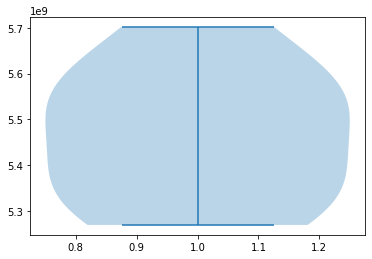

In [20]:
plt.violinplot(us_em_df['Annual CO₂ emissions (tonnes )'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

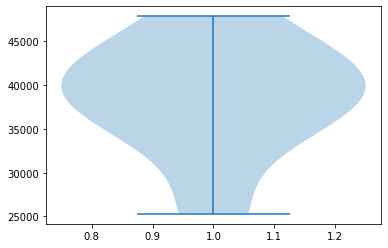

In [21]:
plt.violinplot(value_avg['Total_Value'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

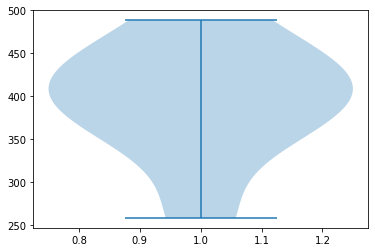

In [22]:
plt.violinplot(value_avg['average_value'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

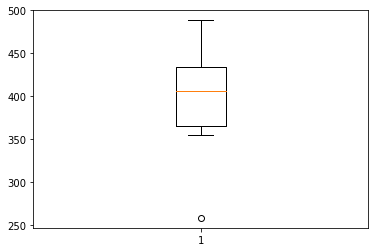

In [23]:
plt.boxplot(value_avg['average_value'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

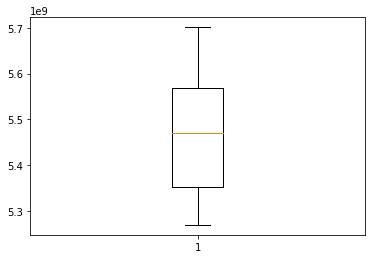

In [24]:
plt.boxplot(us_em_df['Annual CO₂ emissions (tonnes )'])
plt.show

In [25]:
quartiles = value_avg['Total_Value'].quantile([.25,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr
upperoutl = 1.5*iqr + upperq
loweroutl = lowerq - 1.5*iqr
for x in value_avg['Total_Value']:
    if x > upperoutl or x < loweroutl :
        print(f'{x}')

25291.56
